In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
#Importing Training Dataset
dataset=pd.read_csv(r'.\train.csv')
dataset=dataset.set_index(['Accident_ID'])
dataset.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [3]:
#Creating Dummy variable for Non-Tree Classifier models.
dumi=pd.get_dummies(dataset['Accident_Type_Code'])

In [4]:
dataset_2=dataset.copy()

In [5]:
cols=list(dataset_2.columns)
cols

['Severity',
 'Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Accident_Type_Code',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric']

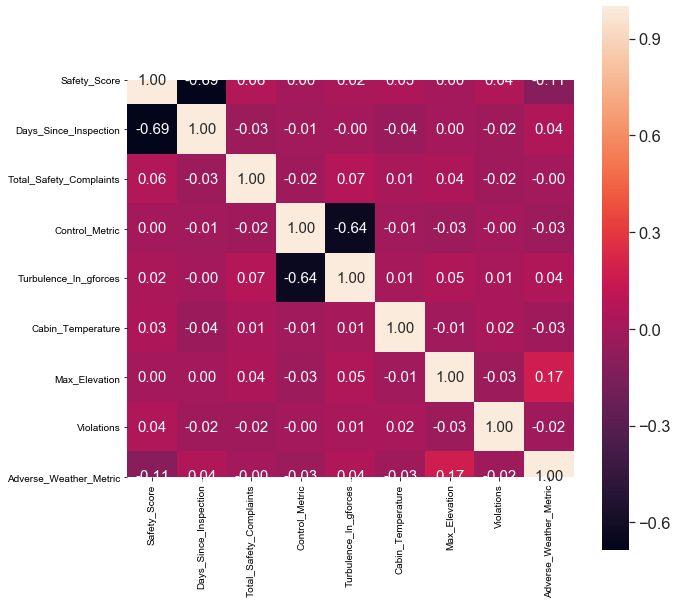

In [6]:
#Creating Heatmap to find correlation among all independent features

rem=['Severity','Accident_Type_Code']
for item in rem:
    cols.remove(item)

temp=dataset_2.drop(columns=['Severity','Accident_Type_Code'])
plt.subplots(figsize=(10,10))
cm = np.corrcoef(temp.values.T)
sns.set(font_scale=1.5)


hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)


# Feature Importance

In [7]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = dataset_2.drop(columns=['Severity','Accident_Type_Code'])  #independent columns
y = dataset_2['Severity']   #target column 

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                     Specs         Score
6            Max_Elevation  37871.221260
0             Safety_Score   8552.477911
3           Control_Metric   1017.270613
8   Adverse_Weather_Metric    160.457298
2  Total_Safety_Complaints     53.652473
7               Violations     27.817094
1    Days_Since_Inspection     23.452196
4    Turbulence_In_gforces      6.544339
5        Cabin_Temperature      0.426112


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.30133    0.22818459 0.04373022 0.14545545 0.0623983  0.04537912
 0.04521648 0.02649901 0.10180682]


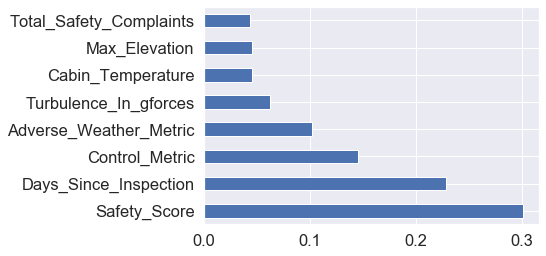

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [9]:
desc=dataset_2.describe()
desc

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


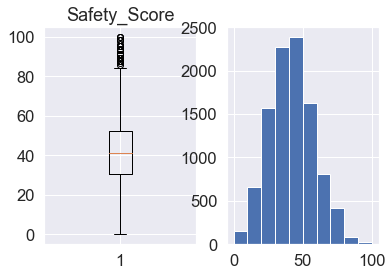

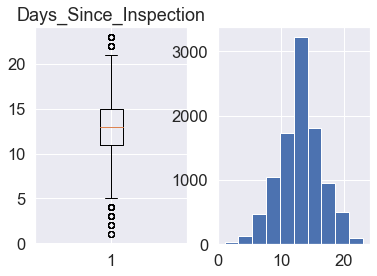

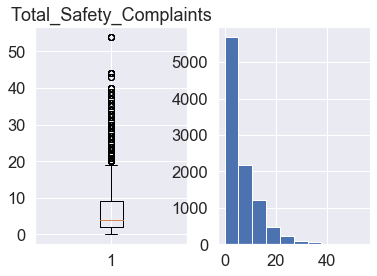

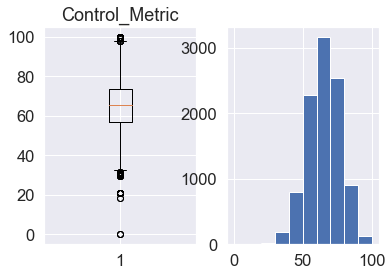

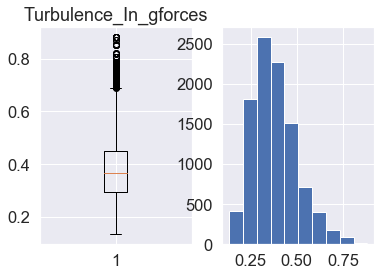

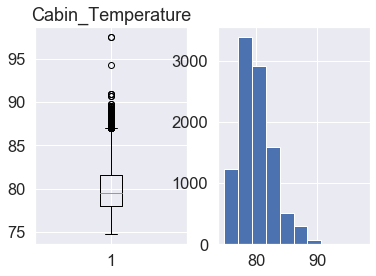

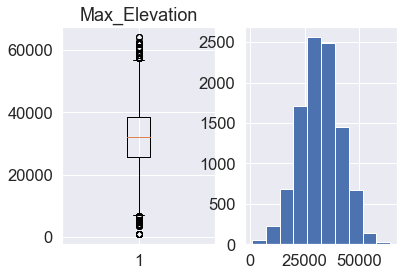

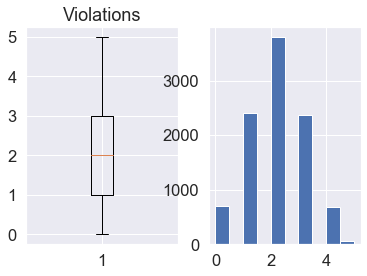

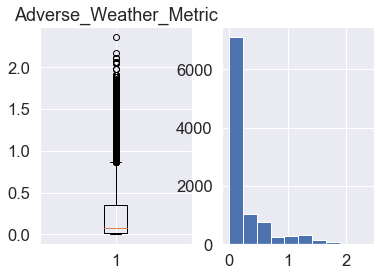

In [10]:
#Plotting Histogram and Boxplot of each column
for i in cols:
    plt.tight_layout()
    plt.subplot(1,2,1)
    plt.boxplot(dataset_2[i])
    plt.title(i)
    #plt.show()
    
    plt.subplot(1,2,2)
    plt.hist(dataset_2[i])
    plt.show()


In [11]:
dataset_2.skew()


Safety_Score               0.236302
Days_Since_Inspection     -0.073910
Total_Safety_Complaints    1.888080
Control_Metric            -0.201482
Turbulence_In_gforces      0.816746
Cabin_Temperature          0.854437
Accident_Type_Code         0.252367
Max_Elevation             -0.038195
Violations                 0.096772
Adverse_Weather_Metric     2.074086
dtype: float64

In [12]:
#Directly Remove Outliers by looking Boxplot
dataset_2=dataset_2[dataset_2['Safety_Score']<(desc['Safety_Score']['75%']+(1.5*(desc['Safety_Score']['75%']-desc['Safety_Score']['25%'])))]
dataset_2=dataset_2[dataset_2['Total_Safety_Complaints']<(desc['Total_Safety_Complaints']['75%']+(1.5*(desc['Total_Safety_Complaints']['75%']-desc['Total_Safety_Complaints']['25%'])))]
dataset_2=dataset_2[dataset_2['Cabin_Temperature']<(desc['Cabin_Temperature']['75%']+(1.5*(desc['Cabin_Temperature']['75%']-desc['Cabin_Temperature']['25%'])))]
dataset_2=dataset_2[dataset_2['Max_Elevation']<(desc['Max_Elevation']['75%']+(1.5*(desc['Max_Elevation']['75%']-desc['Max_Elevation']['25%'])))]
dataset_2=dataset_2[dataset_2['Adverse_Weather_Metric']<0.45]

In [13]:
dataset_2.skew()

Safety_Score               0.146805
Days_Since_Inspection     -0.032438
Total_Safety_Complaints    0.956593
Control_Metric            -0.252772
Turbulence_In_gforces      0.842380
Cabin_Temperature          0.512999
Accident_Type_Code         0.252500
Max_Elevation             -0.045795
Violations                 0.090564
Adverse_Weather_Metric     1.507510
dtype: float64

In [14]:
dataset_2.groupby('Severity').Severity.count()

Severity
Highly_Fatal_And_Damaging                  2145
Minor_Damage_And_Injuries                  1671
Significant_Damage_And_Fatalities          1240
Significant_Damage_And_Serious_Injuries    2279
Name: Severity, dtype: int64

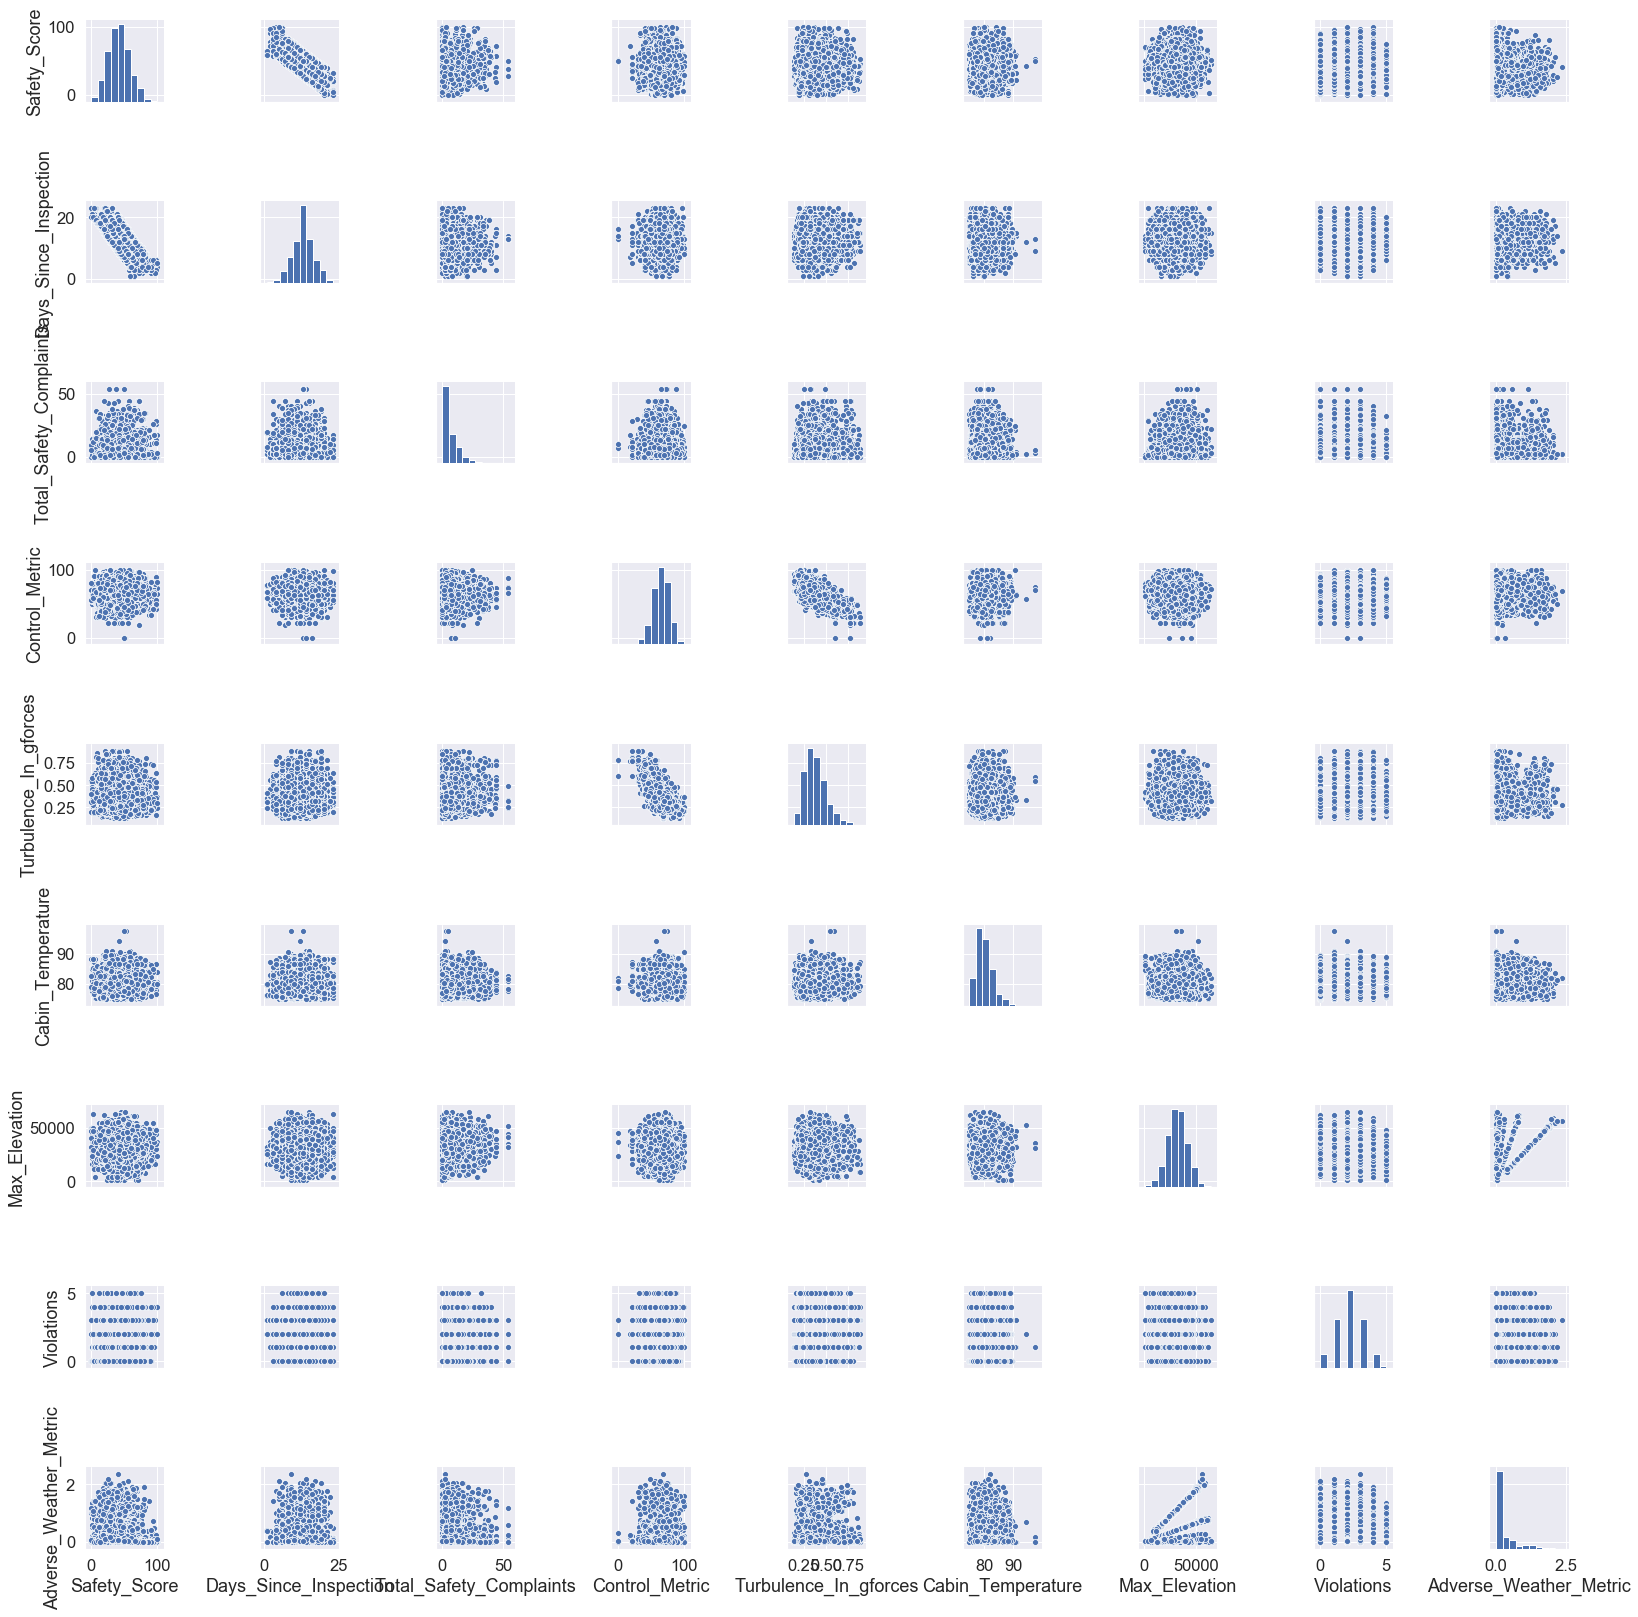

In [15]:
#plotting Pairplot
sns.pairplot(X)


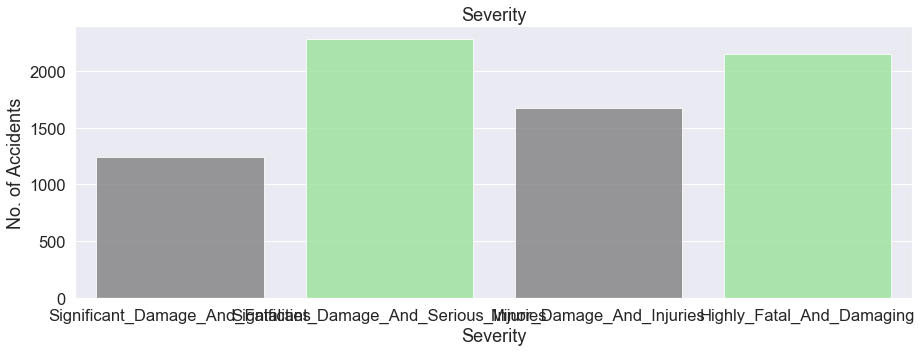

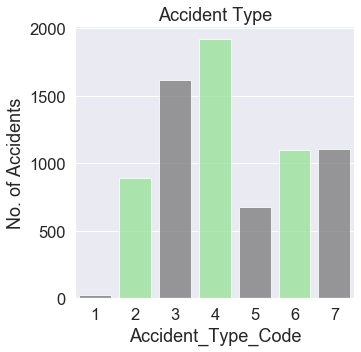

In [16]:
#Distribution of Target Variable
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.countplot(dataset_2['Severity'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Severity')
plt.ylabel('No. of Accidents')
plt.show()
sns.set_style('darkgrid')
plt.figure(figsize = (5,5))
sns.countplot(dataset_2['Accident_Type_Code'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Accident Type')
plt.ylabel('No. of Accidents')
plt.show()

In [17]:
dataset_2.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
2181,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
10947,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505
8008,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419
3789,Highly_Fatal_And_Damaging,36.666667,11,11,80.218778,0.452788,81.15,2,31463.568565,2,0.424912


Splitting Training and Testing Data

In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = dataset_2.drop(['Severity','Turbulence_In_gforces','Cabin_Temperature'], axis = 1)
y = dataset_2['Severity'] # y is the column we're trying to predict

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 101)

In [19]:
##Standardized Some Features

# col2=['Safety_Score','Max_Elevation','Control_Metric','Total_Safety_Complaints','Days_Since_Inspection']
# for i in X:
#     if i in col2:
#         X[i]=preprocessing.scale(X[i])

##Normalize
# col_to_scale=['Safety_Score','Max_Elevation','Control_Metric','Total_Safety_Complaints','Days_Since_Inspection']  
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler = preprocessing.MinMaxScaler()
# #scaled_df = scaler.fit_transform(X)
# #scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
# for col in col_to_scale:
#         X[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(X[col])),columns=[col])


In [20]:
# X['Total_Safety_Complaints']=np.log(X['Total_Safety_Complaints']+1)
# X['Adverse_Weather_Metric']=np.log(X['Adverse_Weather_Metric']+1)

# Applying Models

In [21]:
#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=1000)

# Pass training data into model
accuracy = cross_val_score(lreg, X, y, scoring='f1_weighted', cv = 10)
print(accuracy)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)



[0.46064814 0.46813551 0.38907093 0.51824463 0.48997629 0.48662665
 0.48861327 0.50340615 0.48239626 0.50305399]
Accuracy of Model with Cross Validation is: 47.90171829716588


In [22]:
#Grid Search for LR
from sklearn.model_selection import GridSearchCV
lreg_grid = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.009,0.01,0.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(lreg_grid, param_grid = grid_values,scoring = 'f1_weighted')
grid_clf_acc.fit(X,y)
print('Best Score: ', grid_clf_acc.best_score_)
print('Best Params: ', grid_clf_acc.best_params_)
#Predict values based on new parameters
#y_pred_acc = grid_clf_acc.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

Best Score:  0.6489696927591263
Best Params:  {'C': 1, 'penalty': 'l1'}


In [23]:
#SVM

from sklearn.svm import SVC
svc=SVC(gamma='auto')

accuracy = cross_val_score(svc, X, y, scoring='f1_weighted', cv = 10)
print(accuracy)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.28044897 0.25827735 0.2790948  0.28663863 0.27656045 0.27201546
 0.29064668 0.2825276  0.27493356 0.22979256]
Accuracy of Model with Cross Validation is: 27.30936067186288


SVM and Logistic Regression both giving less accuracy because 
we didn't scale Features and also doesn't used Dummy variable.

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

accuracy = cross_val_score(rand, X, y, scoring='f1_weighted', cv = 2)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.88425789 0.89587838]
Accuracy of Model with Cross Validation is: 89.00681368399228


In [25]:
#Grid Search Random Forest
parameters={'min_samples_split' : [2,5,10,25,50,100,125,150,200],'max_depth': [1,10,25,50,100,125,150,200,250]}
grid_rand=GridSearchCV(estimator=rand,scoring='f1_weighted',param_grid=parameters,cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_rand.fit(X,y)

print('Best Score: ', grid_rand.best_score_)
print('Best Params: ', grid_rand.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.9min finished


Best Score:  0.9134694985482762
Best Params:  {'max_depth': 200, 'min_samples_split': 2}


In [26]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 231, min_samples_leaf=1, min_samples_split=2)

#criterion= 'entropy', max_depth= 1131, min_samples_split= 2
accuracy = cross_val_score(clf, X, y, scoring='f1_weighted', cv = 20)
print(accuracy)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

clf.fit(X,y)

[0.91827326 0.94843863 0.91309333 0.93473999 0.92103026 0.91290602
 0.93742326 0.9397884  0.92928651 0.94829271 0.95087876 0.9452014
 0.95632086 0.93729851 0.94788166 0.96175409 0.94532254 0.91270574
 0.94513414 0.94234346]
Accuracy of Model with Cross Validation is: 93.74056764648451


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=231,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
#Grid Search for DT
#parameters={'min_samples_split' : [2],'max_depth': range(1000,12000),'criterion':['entropy']}
#clf_rand = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 2)
parameters={'criterion':['gini','entropy'],'max_depth': range(1,1000)}
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

grid = GridSearchCV(estimator=clf,
                    param_grid=parameters,
                    scoring='f1_weighted',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X,y)
# parameters={'criterion':['gini','entropy'],'min_samples_split' : range(2,300,10),'max_depth': range(1,20,1)}
# randomized_DT = RandomizedSearchCV(estimator=clf,
#                     param_distributions=parameters,
#                     scoring='f1_weighted',
#                     cv=5,
#                     verbose=1,
#                     n_jobs=-1)
# randomized_result = randomized_DT .fit(X,y)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 1998 candidates, totalling 9990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.2min


Best Score:  0.9371449498929549
Best Params:  {'criterion': 'entropy', 'max_depth': 557}


[Parallel(n_jobs=-1)]: Done 9990 out of 9990 | elapsed:  3.2min finished


In [28]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(
    clf,n_estimators= 600
)
accuracy = cross_val_score(classifier, X, y, scoring='f1_weighted', cv = 10)
print(accuracy)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

classifier.fit(X,y)

[0.93060766 0.92495347 0.92368486 0.94690644 0.93871523 0.94674215
 0.9426972  0.94402641 0.93858873 0.95082836]
Accuracy of Model with Cross Validation is: 93.87750518007833


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=231,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                        

In [29]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
regressor = GradientBoostingClassifier(
    max_depth=5,
    n_estimators=500,
    learning_rate=0.25,
    #max_features=11
)
accuracy = cross_val_score(regressor, X, y, scoring='f1_weighted', cv = 10)
print(accuracy)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)
regressor.fit(X,y)



[0.9673495  0.95363805 0.95760884 0.97001058 0.9659805  0.96183758
 0.97142891 0.96179158 0.97003    0.97128872]
Accuracy of Model with Cross Validation is: 96.50964263214871


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
#Grid Seach for GBC
parameters={'max_depth':[5,10],'n_estimators':[500,600],'learning_rate':[0.25,0.5,0.75]}
grid = GridSearchCV(estimator=regressor,
                    param_grid=parameters,
                    scoring='f1_weighted',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X,y)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.6min finished


Best Score:  0.9642842440870094
Best Params:  {'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 600}


In [31]:
#K-nearest neighbour


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
accuracy = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)
print(accuracy)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)
knn.fit(X, y)


[0.42585034 0.44414169 0.45776567 0.45504087 0.45095368 0.44747613
 0.45156889 0.44747613 0.44065484 0.43579235]
Accuracy of Model with Cross Validation is: 44.56720586305726


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
#LinearDiscriminantAnalysis


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
accuracy = cross_val_score(lda, X, y, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

lda.fit(X,y)

[0.67891156 0.67711172 0.67711172 0.69891008 0.67166213 0.67803547
 0.69031378 0.68894952 0.69304229 0.68715847]
Accuracy of Model with Cross Validation is: 68.41206739018236


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
#Gaussian Naive Bayes


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
accuracy = cross_val_score(gnb, X, y, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

gnb.fit(X,y)

[0.48843537 0.46730245 0.51634877 0.49318801 0.49455041 0.47612551
 0.49113233 0.51159618 0.48703956 0.5       ]
Accuracy of Model with Cross Validation is: 49.25718607920769


GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
#XGBoost
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state=1,gamma=0.1, learning_rate=0.75, max_depth= 5)
accuracy = cross_val_score(xgb, X, y, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

xgb.fit(X,y)
# model.fit(x_train, y_train)
# model.score(x_test,y_test)

[0.96326531 0.95504087 0.95231608 0.96321526 0.95095368 0.95497954
 0.96043656 0.96316508 0.96452933 0.96448087]
Accuracy of Model with Cross Validation is: 95.92382570772871


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.75, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
#GridSearch xgboost
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param={"learning_rate"    : [0.1,0.25,0.5,0.75,1 ] ,
 "max_depth"        : [ 5,10],
 "gamma"            : [ 0.0, 0.1 ]}
# "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

#parameters={'max_depth':[5,10],'n_estimators':[500,600],'learning_rate':[0.25,0.5,0.75]}
grid = GridSearchCV(estimator=xgb,
                    param_grid=param,
                    scoring='f1_weighted',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X,y)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


Best Score:  0.956514635173475
Best Params:  {'gamma': 0.1, 'learning_rate': 0.75, 'max_depth': 5}


TESTING


In [36]:
df_test=pd.read_csv(r'.\test.csv')

In [37]:
df_test

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21
...,...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,11,49.680948,0.470819,77.80,2,48251.586622,2,0.659387,12484
2496,54.840183,9,9,71.194166,0.417087,79.77,6,20761.984416,1,0.005010,12487
2497,36.712329,14,10,91.203282,0.313950,83.96,6,36676.100601,2,0.008629,12488
2498,38.721461,13,14,73.154057,0.275003,77.38,6,24211.359510,1,0.006247,12491


In [38]:
id=df_test.Accident_ID
df_test=df_test.set_index(['Accident_ID'])
df2_test=df_test

In [39]:
#df_test_dum=pd.get_dummies(df_test['Accident_Type_Code'])
#df2_test=pd.concat([df_test,df_test_dum],axis='columns')
df2_test.drop(columns=['Turbulence_In_gforces','Cabin_Temperature'],inplace=True)

In [40]:
#print(n)
df2_test['Total_Safety_Complaints']=np.log(df2_test['Total_Safety_Complaints']+1)
df2_test['Adverse_Weather_Metric']=np.log(df2_test['Adverse_Weather_Metric']+1)
df2_test


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,
1,19.497717,16,1.945910,72.151322,4,37949.724386,2,0.067371
10,58.173516,15,1.386294,64.585232,7,30194.805567,2,0.002774
14,33.287671,15,1.386294,64.721969,6,17572.925484,1,0.004307
17,3.287671,21,1.791759,66.362808,3,40209.186341,2,0.182314
21,10.867580,18,1.098612,56.107566,2,35495.525408,2,0.394536
...,...,...,...,...,...,...,...,...
12484,68.127854,8,2.484907,49.680948,2,48251.586622,2,0.506448
12487,54.840183,9,2.302585,71.194166,6,20761.984416,1,0.004997
12488,36.712329,14,2.397895,91.203282,6,36676.100601,2,0.008592


In [41]:
X_test = df2_test.copy()
X_test.head()



,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,
1,19.497717,16,1.945910,72.151322,4,37949.724386,2,0.067371
10,58.173516,15,1.386294,64.585232,7,30194.805567,2,0.002774
14,33.287671,15,1.386294,64.721969,6,17572.925484,1,0.004307
17,3.287671,21,1.791759,66.362808,3,40209.186341,2,0.182314
21,10.867580,18,1.098612,56.107566,2,35495.525408,2,0.394536


In [42]:
y_test_pred_svc = regressor.predict(X_test)

In [43]:
id=list(id)
list(y_test_pred_svc)

['Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Minor_Damage_And_Injuries',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'High

In [44]:
final=pd.DataFrame({'Accident_ID':id,'Severity':y_test_pred_svc})
final.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [45]:
final.to_csv('.\submission_final.csv',index=False)